# Machine Learning II Project - UrbanSound8K dataset

#### Work done by: Ana Pinto (202105085) |  Miguel Santos (202105289) | Tomás Rodrigues (202107937)
#### Date: 05/12/2023

### Index

5. [MLP Classifier](#MLP)<br>
    5.1 [Loading Dataset](#Dataset)<br>
    5.2 [Model Design](#Model)<br>
6. [Training & Results](#Training)<br>
     6.1 [Accuracys, Losses and Confusions Matrix](#AL)<br>
        6.1.1 [Final Confusion Matrix](#FCM)<br>
    6.2 [Other Metrics](#Metrics)<br>
7. [Conclusions](#Conclusions)<br>
[Bonus](#Bonus)<br>


<a id='MLP-Classifier'></a>

## 4. MLP Classifier

Multilayer Perceptron Neural Network is a Neural Network with multiple layers where all of them are connected. The training of the model employs the Backpropagation algorithm. The MLP model consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of one or more neurons. The neurons in the input layer connect to the neurons in the hidden layer, and similarly, the neurons in the hidden layer connect to the neurons in the output layer. It is a feedforward neural network, meaning that data is transmitted from the input layer to the output layer in the forward direction.

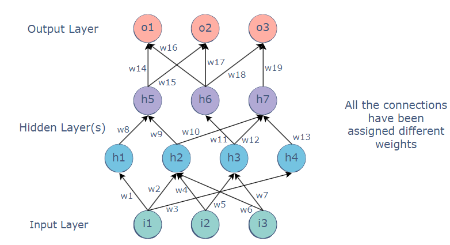

Fig. 2 - MLP model architecture

The connections between the layers have associated weights, which determine their importance. This concept is the backbone of an MLP’s learning process.

The MLP model will be tuned using Adam optimization. Sparse categorical cross-entropy will be used as the loss function, and the model's performance will be analyzed using sparse categorical accuracy.

<a id='Dataset'></a>

### 5.1 Loading Dataset



Import libraries that are needed for the code below

In [1]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Activation, Flatten
import random
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
import seaborn as sns
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

Open the dataset that was created in the previous notebook

In [2]:

with open('dataset_mlp_ids.pkl', 'rb') as file:
    loaded_dataset = pickle.load(file)

See the shape of the dataset

In [3]:
sound = np.array(loaded_dataset[0][0])
print(sound.shape)
input_shape = (sound.shape[1], sound.shape[2])

(873, 20, 173)


- Each sound is represented by a 2x2 matrix, which is a 20x173 numeric translation of the MFCC spectrogram.

<a id='Model'></a>

### 5.2 Model Design

We define a model with :

Input Layer:

- Flatten layer without activation: This layer is responsible for flattening the input data.

Hidden Layers:

- Dense layer (1st hidden layer):

    Dropout layer: This layer randomly drops 50% of the nodes during training, which helps prevent overfitting. It introduces a form of regularization. The purpose of dropout is to reduce the reliance on specific nodes, making the network more robust.

- Dense layer (2nd hidden layer):

    Dropout layer: Similar to the first hidden layer, it randomly drops 50% of the nodes during training. Dropout is a regularization technique that helps prevent overfitting by randomly deactivating neurons.


Output Layer:

- Dense layer (Output layer):

    This layer is responsible for producing the final output probabilities for each class in a multi-class classification problem.

In [5]:
def create_model():
    n_nodes = 1600

    # Construct model
    model = Sequential()

    model.add(Flatten(input_shape=input_shape))  # Flatten layer without activation

    model.add(Dense(n_nodes, activation='relu'))  # Dense layer with activation
    model.add(Dropout(0.5))  # Dropout layer

    model.add(Dense(n_nodes // 2, activation='relu'))  # Dense layer with activation
    model.add(Dropout(0.5))  # Dropout layer

    model.add(Dense(10, activation='softmax')) # Output layer with softmax activation

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    
    return model

model = create_model()
model.summary()

keras.utils.plot_model(model, "model.png", show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3460)              0         
                                                                 
 dense_3 (Dense)             (None, 1600)              5537600   
                                                                 
 dropout_2 (Dropout)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 800)               1280800   
                                                                 
 dropout_3 (Dropout)         (None, 800)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                8010      
                                                                 
Total params: 6,826,410
Trainable params: 6,826,410
No

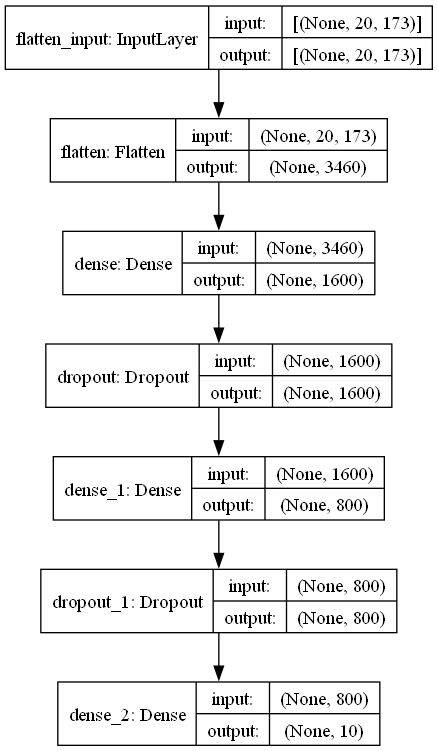

<a id='Training'></a>


## 6. Training & Results

10 Fold Cross Validation

We divided the folds into three sets: train_set (8 folds), val_set (1 fold), test_set (1 fold).
Then, we show the plots of the training and validation losses, accuracies and confusion matrix of the test set for each fold.
This way, we can see the evolution of the model and the results of each fold.

<a id='AL'></a>

#### 6.1 Accuracys, Losses and Confusions Matrix

After training the model, we plot the training and validation losses and accuracies for each fold and the confusion matrix of the test set for each fold.

Epoch 1/50
217/217 [==============================] - 7s 33ms/step - loss: 1.6388 - sparse_categorical_accuracy: 0.4201 - val_loss: 1.6579 - val_sparse_categorical_accuracy: 0.4249
Epoch 2/50
217/217 [==============================] - 7s 31ms/step - loss: 1.3017 - sparse_categorical_accuracy: 0.5410 - val_loss: 1.4883 - val_sparse_categorical_accuracy: 0.4551
Epoch 3/50
217/217 [==============================] - 7s 31ms/step - loss: 1.1652 - sparse_categorical_accuracy: 0.5927 - val_loss: 1.3345 - val_sparse_categorical_accuracy: 0.4897
Epoch 4/50
217/217 [==============================] - 7s 32ms/step - loss: 1.0720 - sparse_categorical_accuracy: 0.6240 - val_loss: 1.4548 - val_sparse_categorical_accuracy: 0.4616
Epoch 5/50
217/217 [==============================] - 7s 34ms/step - loss: 1.0212 - sparse_categorical_accuracy: 0.6426 - val_loss: 1.3345 - val_sparse_categorical_accuracy: 0.5438
Epoch 6/50
217/217 [==============================] - 7s 33ms/step - loss: 0.9707 - sparse_cate

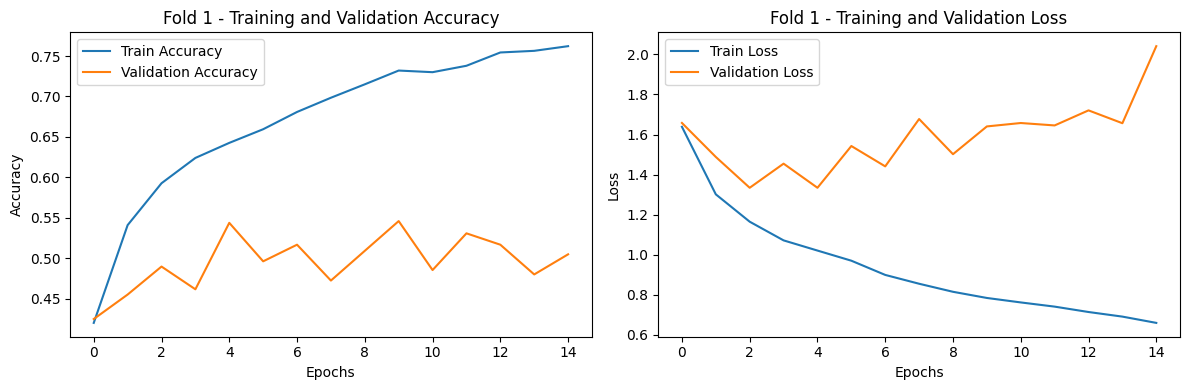

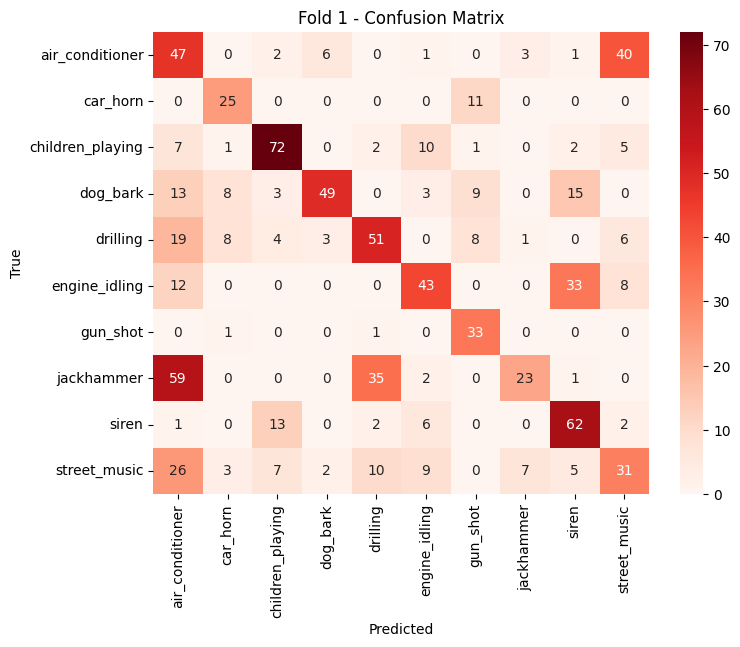

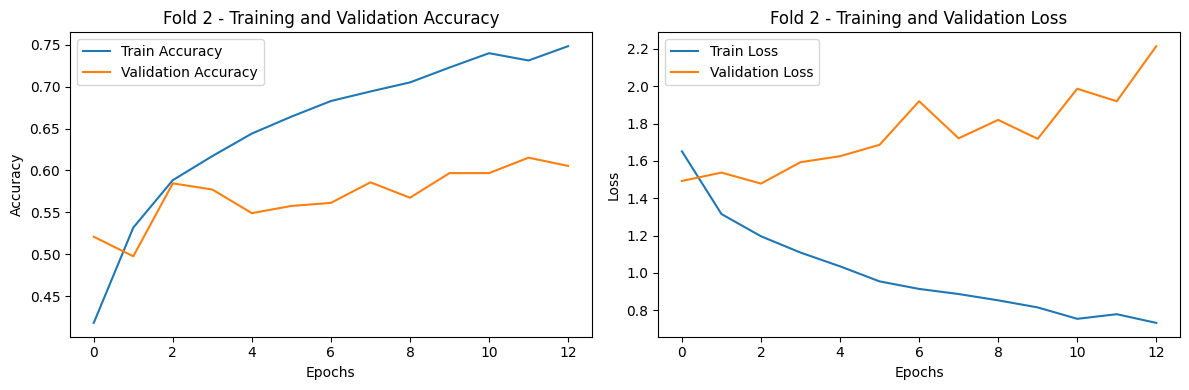

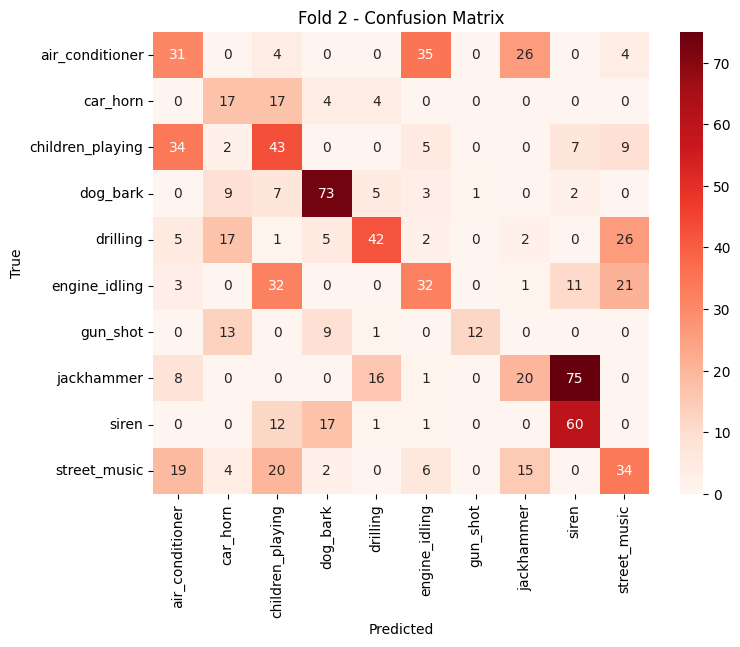

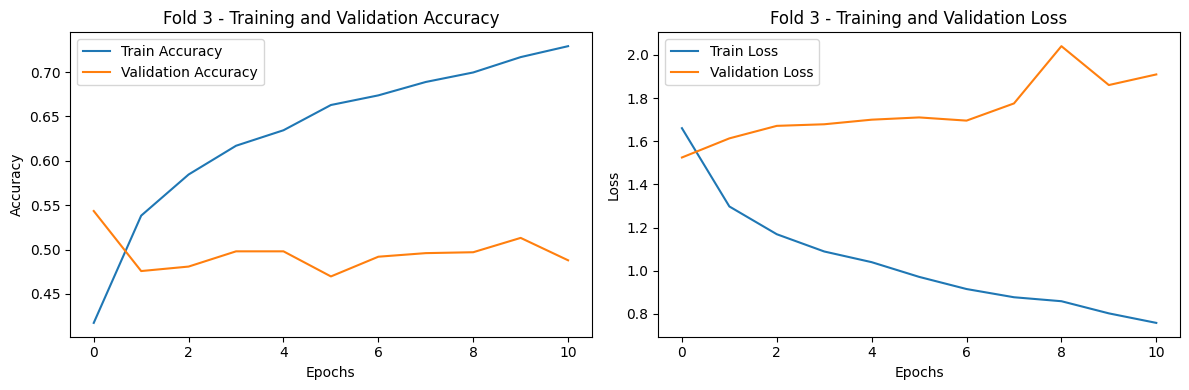

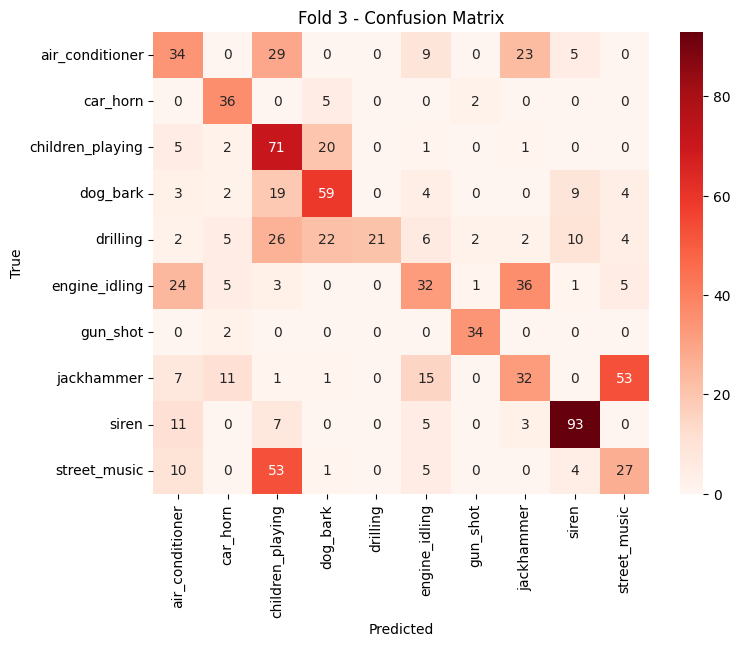

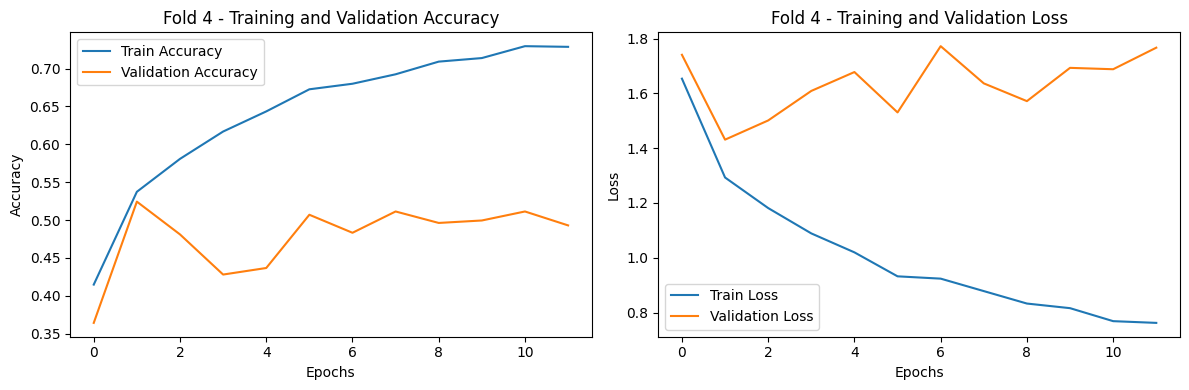

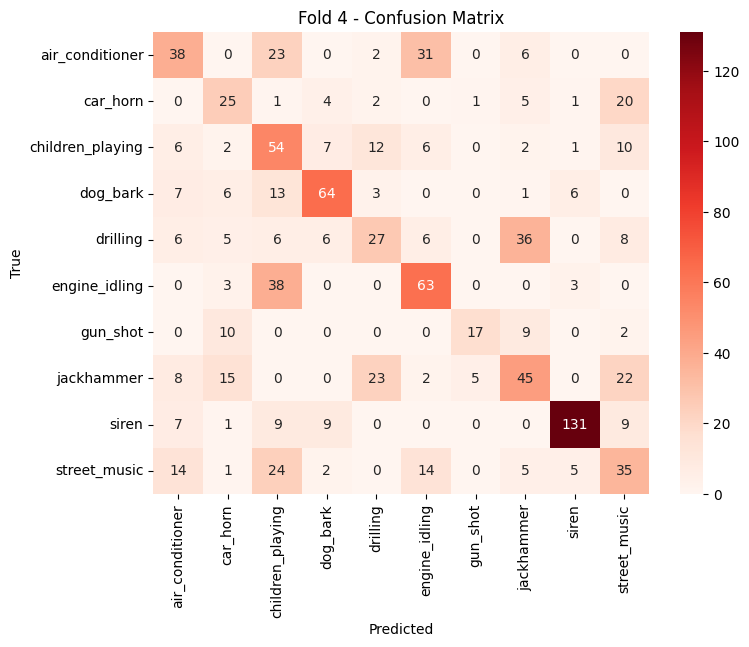

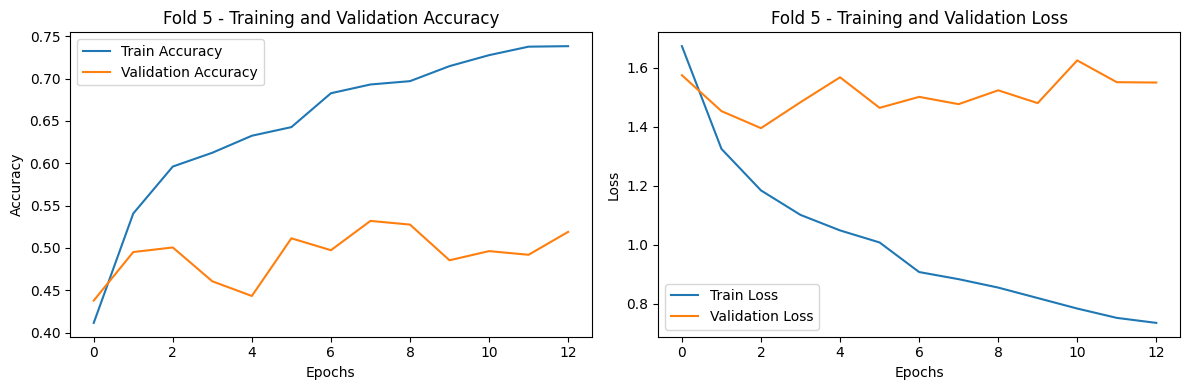

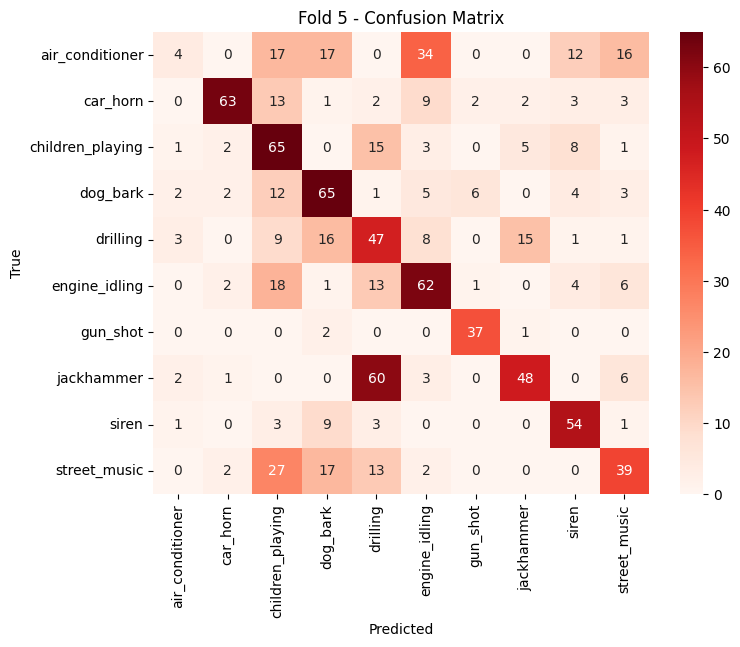

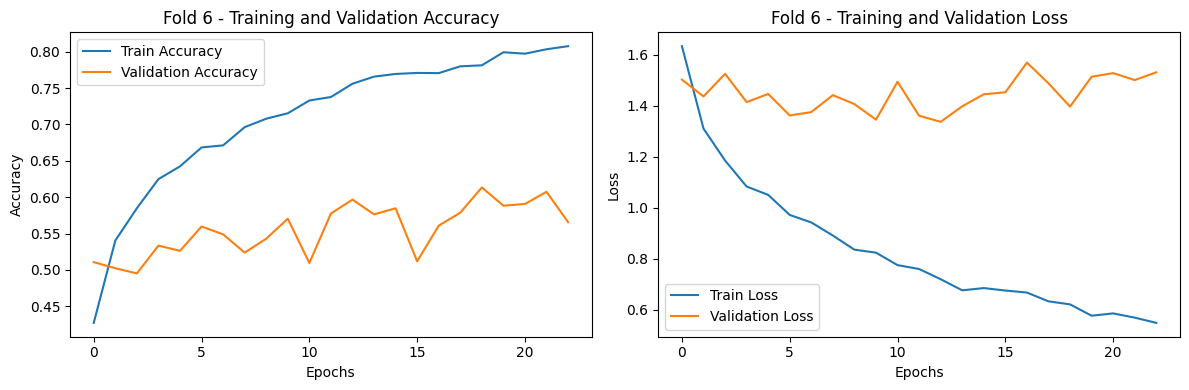

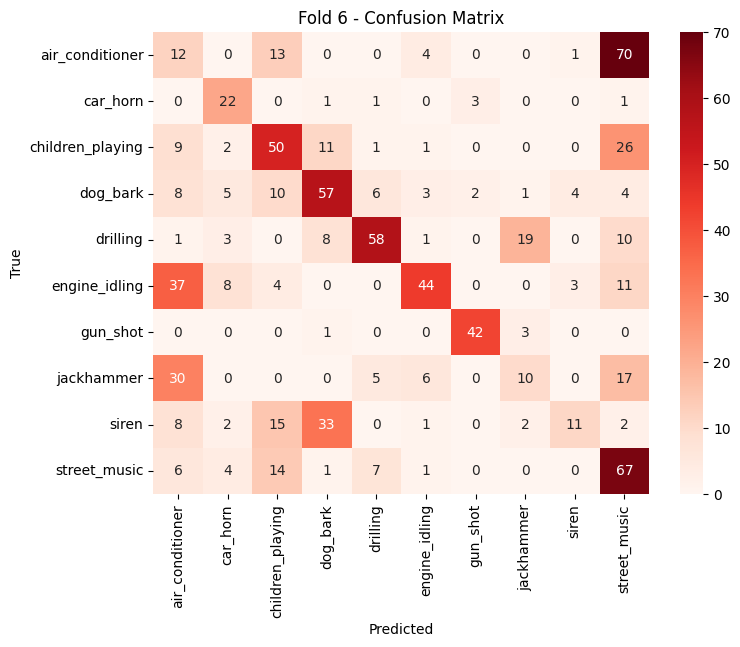

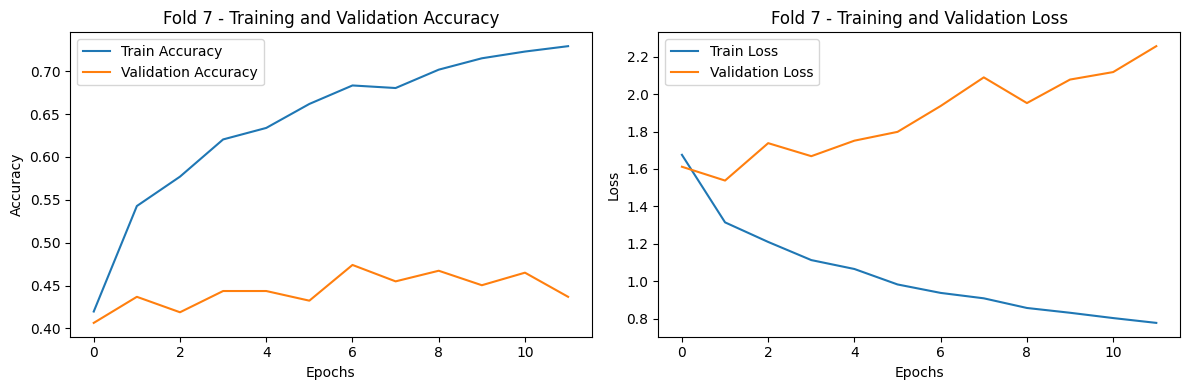

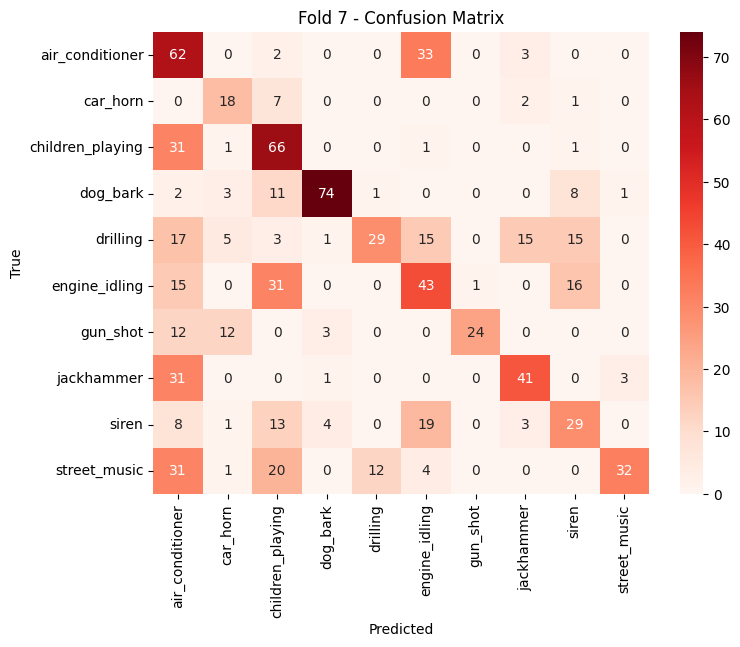

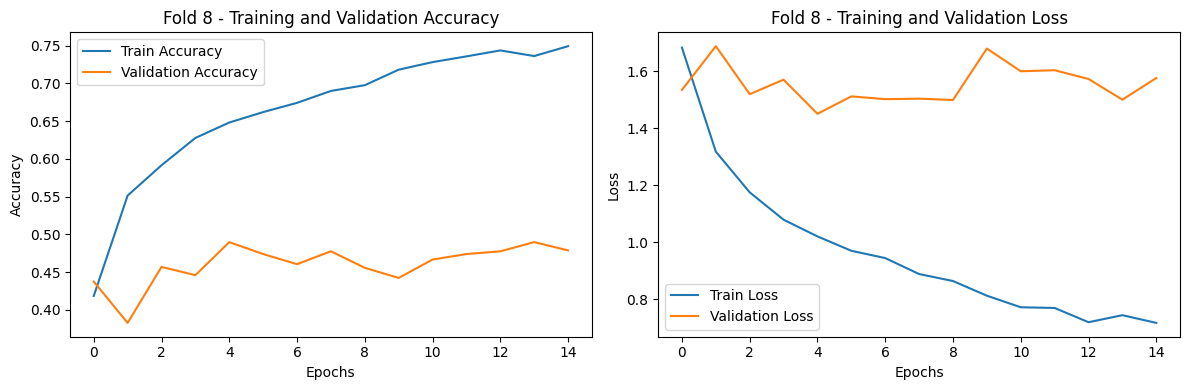

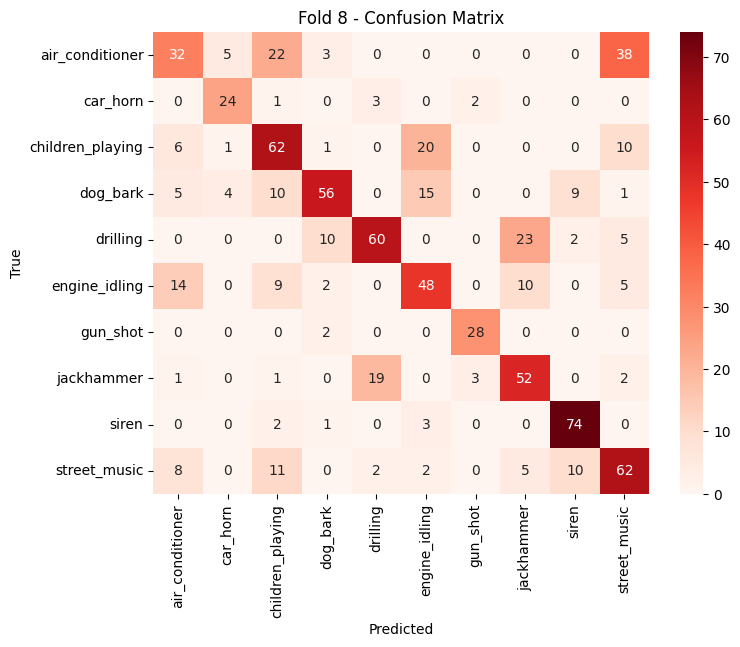

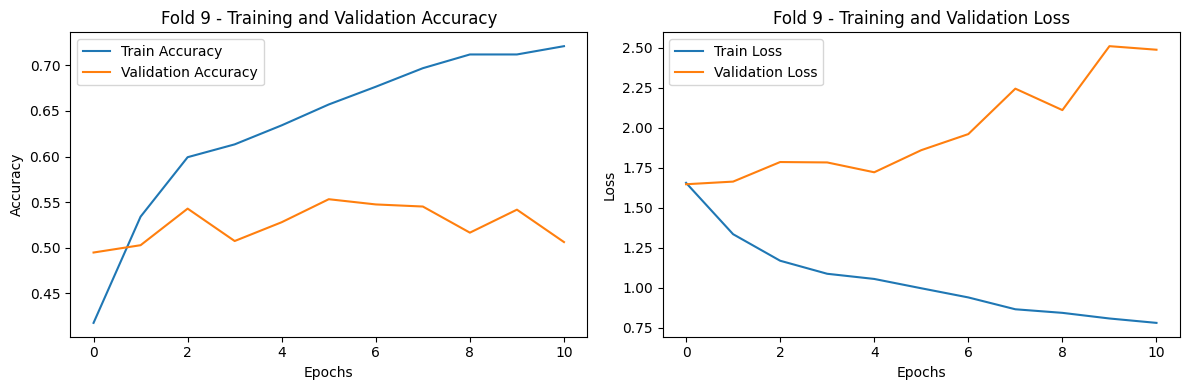

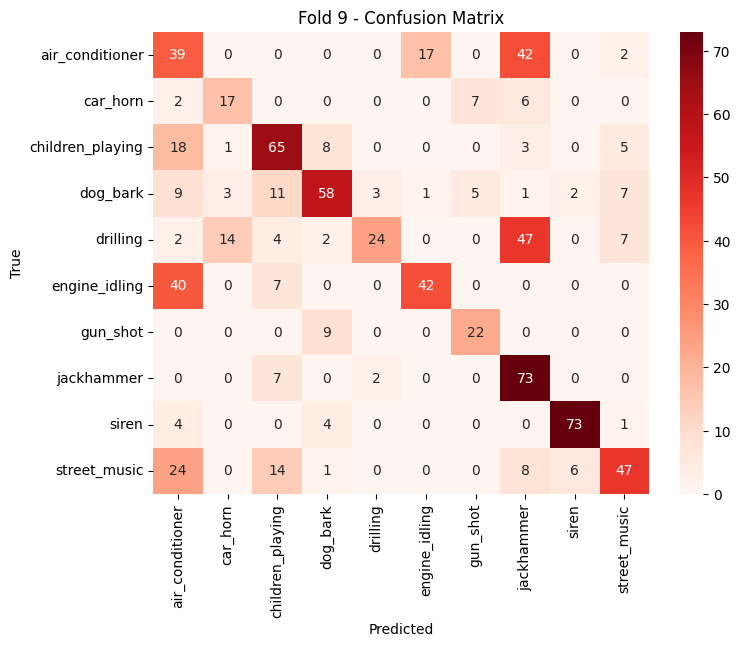

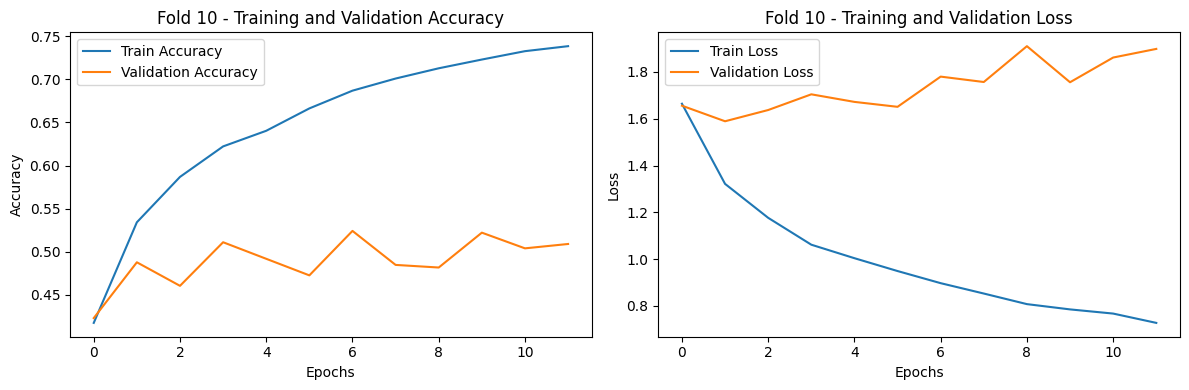

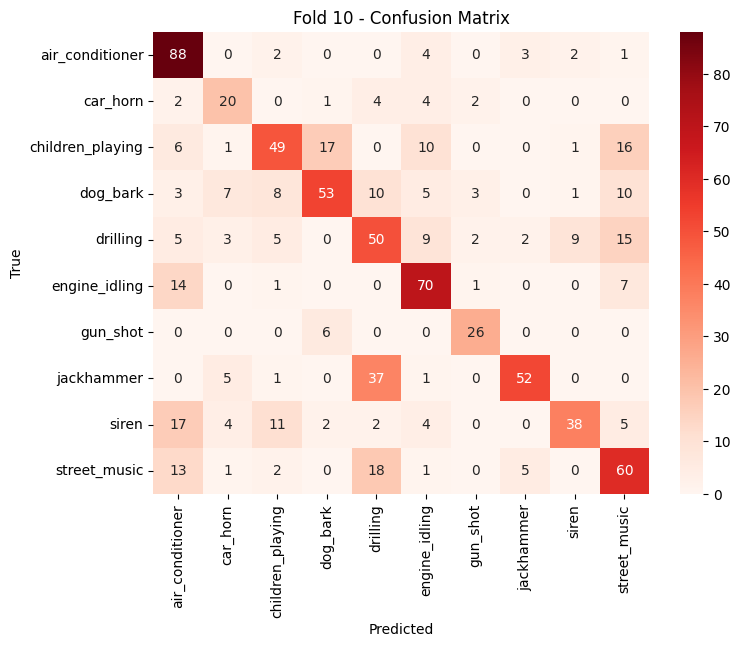

In [6]:
# Lists to store metrics for each fold
accuracies_test = []
accuracies_val = []
accuracies_train = []

# Lists to store metrics for each fold
precisions = []
f1_scores = []
recalls = []

# Lists to store plots for each fold
accuracy_plots = []
loss_plots = []
confusion_matrix_plots = []

# labels for confusion matrix
class_labels = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']

# Final confusion matrix
total_confusion_matrix = np.zeros((len(class_labels), len(class_labels)), dtype=int)
class_counts = np.zeros(len(class_labels), dtype=int)

for fold_num in range(10):
    model = create_model() # Create a new model
    data = copy.deepcopy(loaded_dataset) # Create a copy of the dataset
    X_test,y_test = data.pop(fold_num) # The test set is taken from fold_num
    val = random.randint(0,8)
    X_val, y_val = data.pop(val) # Chose a random fold to be the validation set
    
    # The remaining folds are the training set 
    X_train = np.array(data[7][0])
    y_train = np.array(data[7][1]) 
    for i in range(7):
        X_train = np.concatenate((X_train,np.array(data[i][0])),axis=0)
        y_train = np.concatenate((y_train,np.array(data[i][1])),axis=0)

    # Convert to numpy arrays
    X_val = np.array(X_val)
    X_test = np.array(X_test)
    # Convert y to integers because of sparse_categorical_crossentropy ->
    # -> used for multi-class classification where the target variable is represented as integers 
    y_train = np.array(y_train).astype(int)
    y_val = np.array(y_val).astype(int)
    y_test = np.array(y_test).astype(int)


    n_epochs = 50 #Mudar para 30/50 ou outra cena
    n_batch = 32

    start = datetime.now()
    
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train model
    history = model.fit(X_train,
                        y_train,
                        batch_size=n_batch,
                        epochs=n_epochs,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping],
                        verbose=1)

    
    duration = datetime.now() - start
    print("Training for fold {} finished in time: {}".format(fold_num + 1, duration))

    
    # Plot training and validation accuracy and loss over epochs
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    axs[0].plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Fold {} - Training and Validation Accuracy'.format(fold_num + 1))
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss plot
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Fold {} - Training and Validation Loss'.format(fold_num + 1))
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    
    # Append the accuracy and loss plots for later display
    accuracy_plots.append(fig)

    # Evaluate on the test set
    test_score = model.evaluate(X_test, y_test, verbose=0)
    test_accuracy = 100 * test_score[1]
    accuracies_test.append(test_accuracy)
    accuracies_train.append(history.history['sparse_categorical_accuracy'][-1])
    accuracies_val.append(history.history['val_sparse_categorical_accuracy'][-1])
    print("Test accuracy for fold {}: {:.4f}%".format(fold_num + 1, test_accuracy))

    # Compute and plot the confusion matrix
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
    y_true_classes = y_test
    cm = confusion_matrix(y_true_classes, y_pred_classes, labels=np.arange(len(class_labels)))

    # Update the final confusion matrix and class counts
    total_confusion_matrix += cm
    class_counts += np.sum(cm, axis=1)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Fold {} - Confusion Matrix'.format(fold_num + 1))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Append the confusion matrix plot for later display
    confusion_matrix_plots.append(plt.gcf())

    # Calculate precision, F1 score, and recall
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

    precisions.append(precision)
    f1_scores.append(f1)
    recalls.append(recall)
    

<a id='FCM'></a>

##### 6.1.1 Final Confusion Matrix

Display the confusion matrix of all folds.

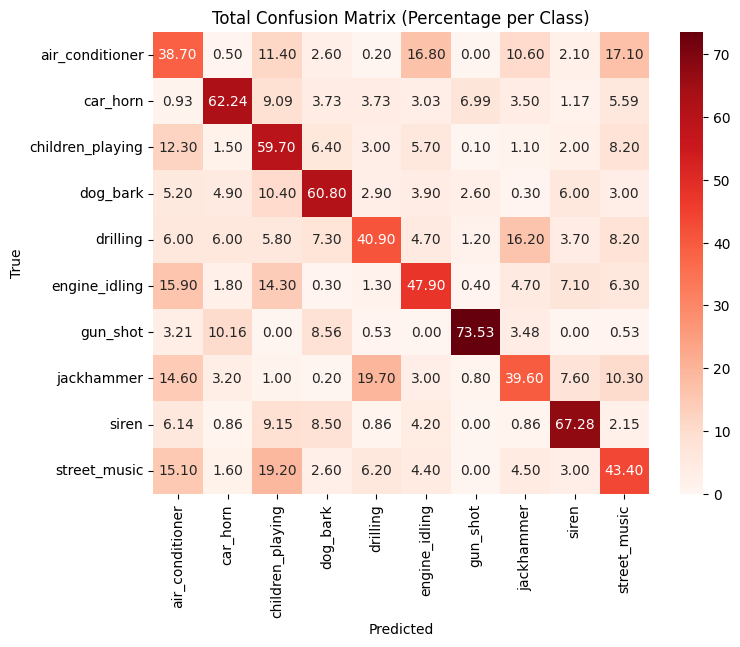

In [7]:
# Converte a matriz de confusão total para porcentagens relativas a cada classe
total_confusion_matrix_percent = (total_confusion_matrix / class_counts[:, np.newaxis]) * 100

# Plotar a matriz de confusão total em porcentagens relativas a cada classe
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix_percent, annot=True, fmt='.2f', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Total Confusion Matrix (Percentage per Class)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a id='Metrics'></a>

#### 6.2 Other Metrics

We calculate the precision, recall, f1-score and support for each fold and the average of all folds.

In [8]:
data = {'Metric': ['Average Test Accuracy','Standard Deviation','Average Train Accuracy', 'Average Validation Accuracy', 'Average Precision', 'Average F1 Score', 'Average Recall'],
    'Value': [np.mean(accuracies_test),np.std(accuracies_test) ,np.mean(accuracies_train)*100, np.mean(accuracies_val)*100, np.mean(precisions)* 100, np.mean(f1_scores)*100, np.mean(recalls)*100]}

df = pd.DataFrame(data)
df

,Metric,Value
0,Average Test Accuracy,51.432243
1,Standard Deviation,6.171786
2,Average Train Accuracy,74.518064
3,Average Validation Accuracy,51.067245
4,Average Precision,55.381768
5,Average F1 Score,50.948800
6,Average Recall,51.432243


### 7. Conclusions

- According to the results obtained:

|Metric | Value |
| :-: | :-: |
Average Test Accuracy |	51.432243
Test Accuracy Standard Deviation |	6.171786
Average Train Accuracy |	74.518064
Average Validation Accuracy | 51.067245
Average Precision| 55.381768
Average F1 Score	| 50.948800
Average Recall |	51.432243

Our model, considering it is a ten-class classification task, had a decent performance. Taking into account that there was overfitting (test and validation accuracy is considerably lower than training accuracy), the validation loss was increasing over time, and that was not what we expected. Looking into the final confusion matrix, in most of the cases, our model was able to make correct predictions. The deviation has a small impact on the accuracy of the test, as it is low, and the accuracy will drop to less than 50 percent, which is not so good (+/-) 45%.

- We tried to add more layers with different configurations, but the results were not better than the ones obtained with the model presented above. We also tried to change the learning rate, but the results were not better either. We thought that if the training time was shorter and we had better-performing PCs, the results would be better because we had to create simpler models because the more complex ones took many hours.

- The best predicted classes were gunshot and siren.

- Comparing to the next notebook, we can see that the results are worse, but not by much.

<a id='Bonus'></a>

## Bonus

- We use the attack model FGSM from tensorflow to test our model robustness.

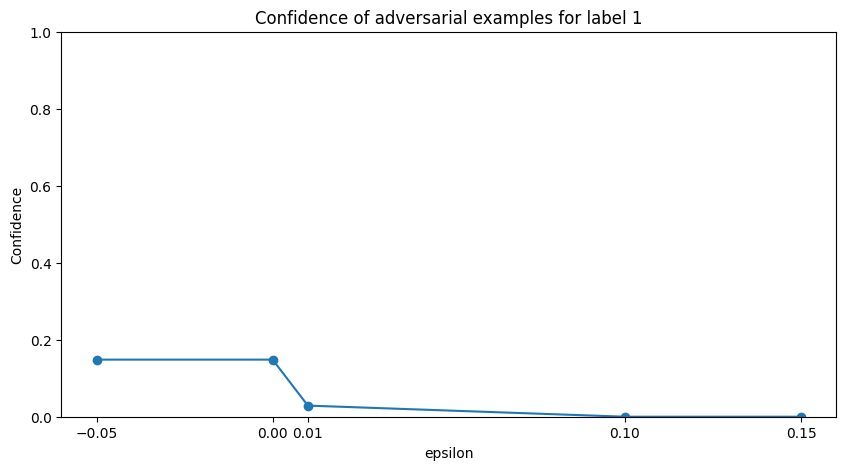

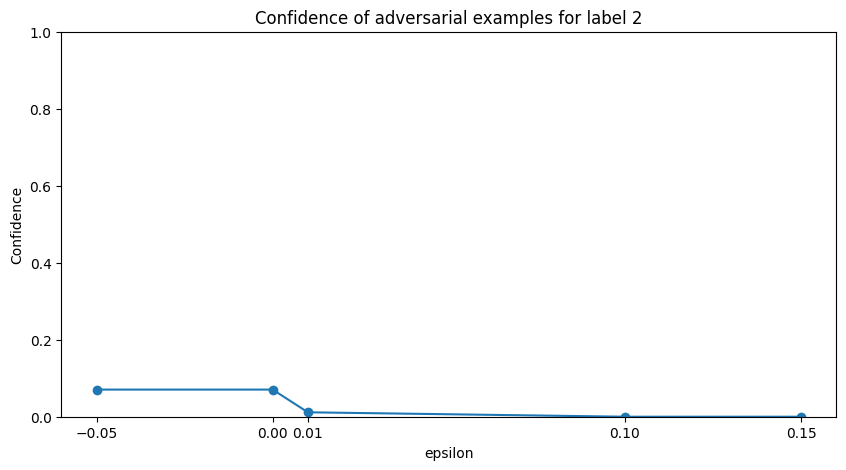

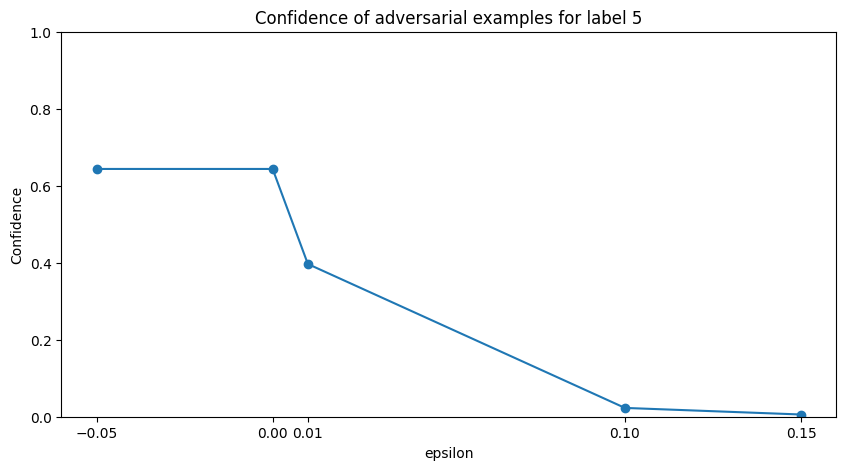

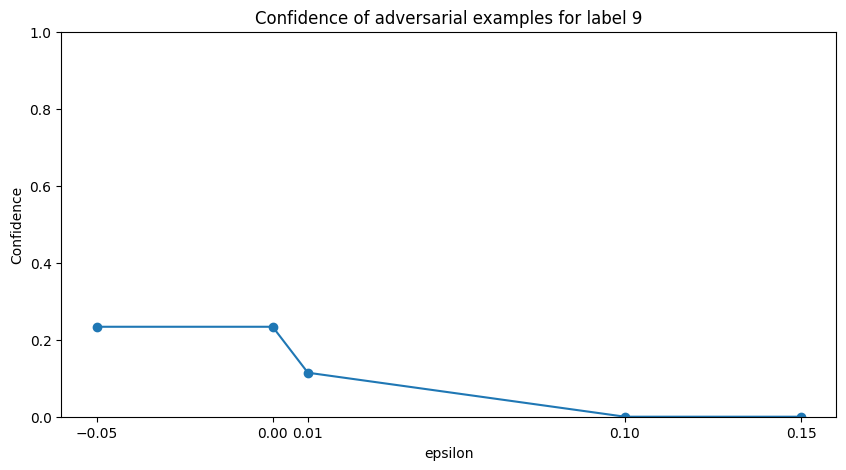

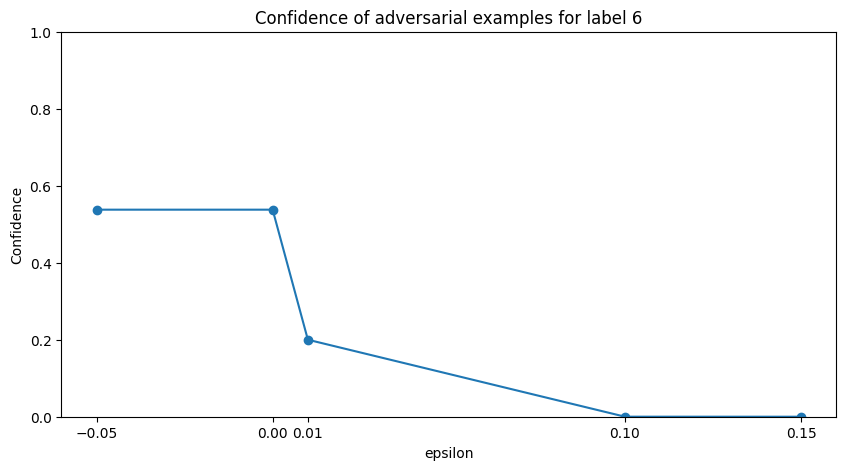

In [ ]:
def create_adversarial_pattern(input_image, input_label,model):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad
x= np.asarray(X_test)
y=np.asarray(y_test)
perturbations =create_adversarial_pattern(tf.convert_to_tensor(x),tf.convert_to_tensor(y),model)
#plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]
def display_images(image,p,model,label):
    adv_values = []
    confidence = model.predict(image,verbose = 0) 
    true_value = confidence[0][label]

    epsilons = [0, 0.01, 0.1, 0.15]

    for i, eps in enumerate(epsilons):
        adv_x = image + eps*p
        adv_x = tf.clip_by_value(adv_x, -1, 1)
        
        confidence_adv = model.predict(adv_x,verbose = 0)
        confidence_adv_max_value = confidence_adv[0][label]
        

        
        adv_values.append(confidence_adv_max_value)

    epsilons = [-0.05] + epsilons
    adv_values = [true_value] + adv_values
    plt.figure(figsize=(10,5 ))
    plt.plot(epsilons,adv_values, marker='o')

    # Adding labels and title
    plt.xlabel('epsilon')
    plt.xticks(epsilons)
    plt.ylabel('Confidence')
    plt.ylim(0, 1) 
    plt.title(f'Confidence of adversarial examples for label {label}')

    # Display the plot
    plt.show()

display_images(x[0],perturbations[0],model,y_test[0])
display_images(x[15],perturbations[15],model,y_test[15])
display_images(x[30],perturbations[30],model,y_test[30])
display_images(x[60],perturbations[60],model,y_test[60])
display_images(x[200],perturbations[200],model,y_test[200])

- Based on these results, our MLP is not robust to adversial examples. A small change to the original image causes a great impact on the confidence of the model.